<a href="https://colab.research.google.com/github/kaushikrahul1993/Telecom-Domain/blob/main/ML_Telecom_Custmer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/09-Telecom Domain"
os.chdir(path)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data_details=pd.read_excel('Dataset Attributes.xlsx')
data_details

,Dataset Attributes
0,NaN
1,customerID : Customer ID
2,gender : Whether the customer is a male or a f...
3,SeniorCitizen : Whether the customer is a seni...
4,Partner : Whether the customer has a partner o...
5,Dependents : Whether the customer has dependen...
6,tenure : Number of months the customer has sta...
7,PhoneService : Whether the customer has a phon...
8,MultipleLines : Whether the customer has multi...
9,InternetService : Customer’s internet service ...


In [ ]:
data = pd.read_csv('Telecom_Customer_Details.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data["TotalCharges"]=np.where(data["TotalCharges"]==' ',np.nan,data["TotalCharges"])
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [ ]:
data["TotalCharges"].isnull().sum()

11

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80


In [ ]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
data=data.drop(columns=['customerID'])

In [ ]:
data.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [ ]:
data["SeniorCitizen"]=data["SeniorCitizen"].astype('object')

In [ ]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include='object').columns

In [ ]:
num_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
cat_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
for col in cat_col:
  print(data[col].value_counts())
  print("**********************\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64
**********************

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
**********************

Partner
No     3641
Yes    3402
Name: count, dtype: int64
**********************

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**********************

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**********************

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**********************

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**********************

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**********************

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
**********************

DeviceProtecti

In [ ]:
data.dropna(axis=0,how='any',inplace=True)

In [ ]:
data[data.duplicated(keep='first')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [ ]:
data.drop_duplicates(keep='first',inplace=True)

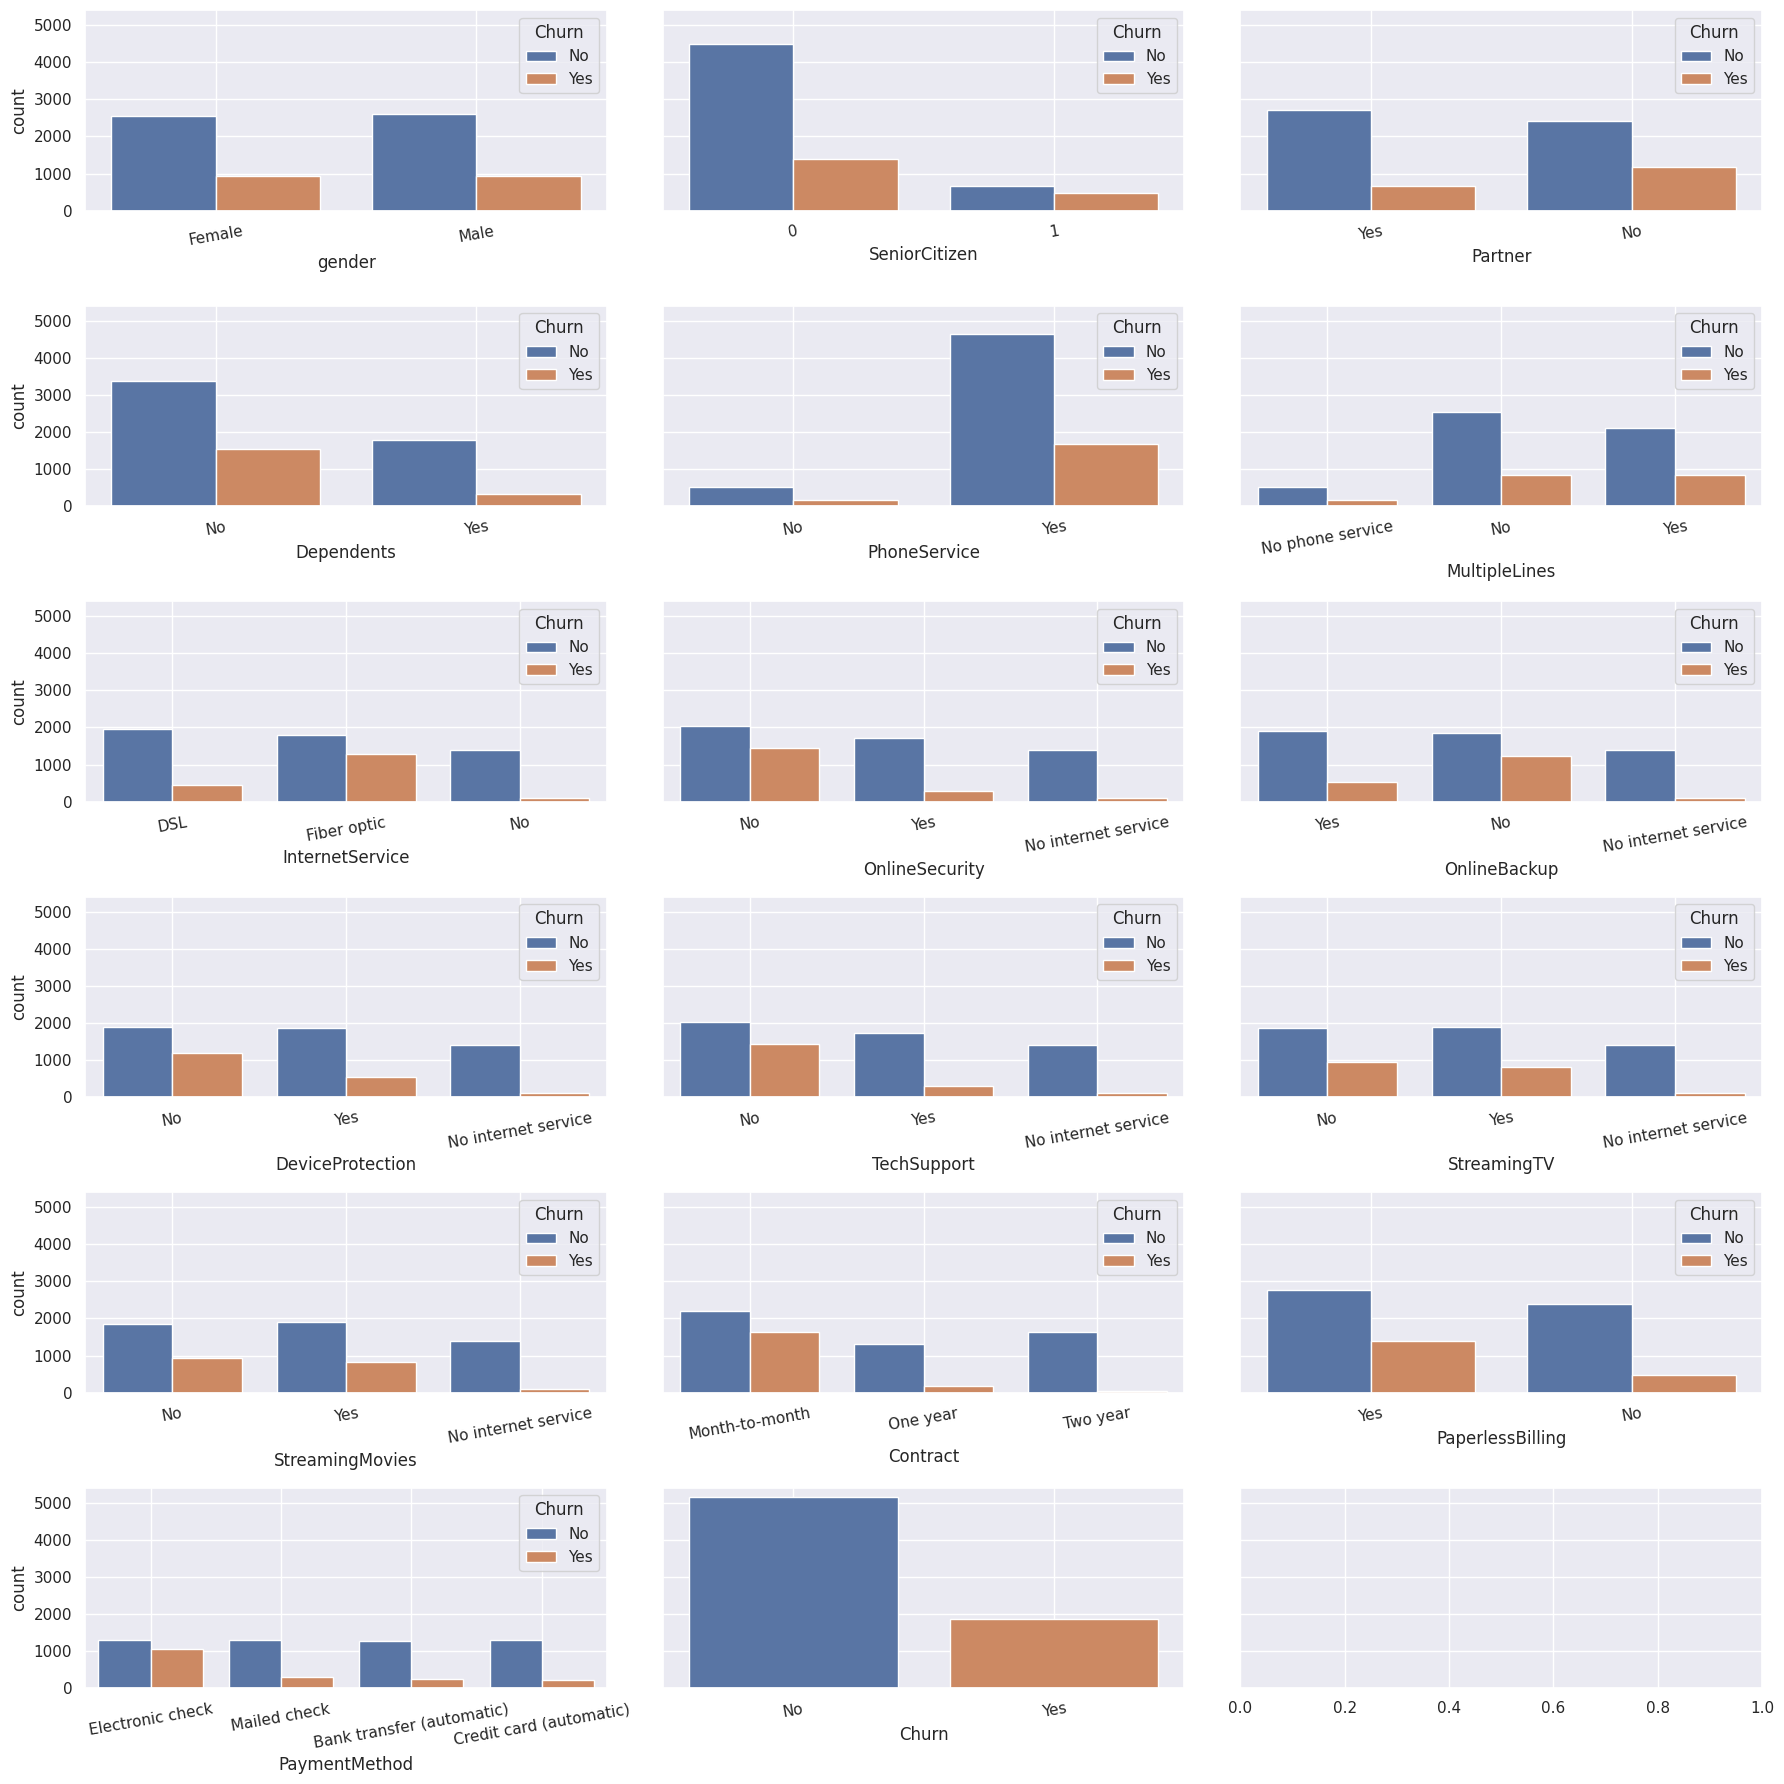

In [ ]:
i=1
plt.subplots(6,3, figsize=(18,18),sharey=True)
for col in cat_col:
    try:
      plt.subplot(6,3,i)
      sns.countplot(x=col,data=data,hue="Churn")
      plt.grid(visible=True, which='both', axis='both')
      plt.xticks(rotation=10)
      i=i+1
    except:
      break
plt.tight_layout()
plt.show()

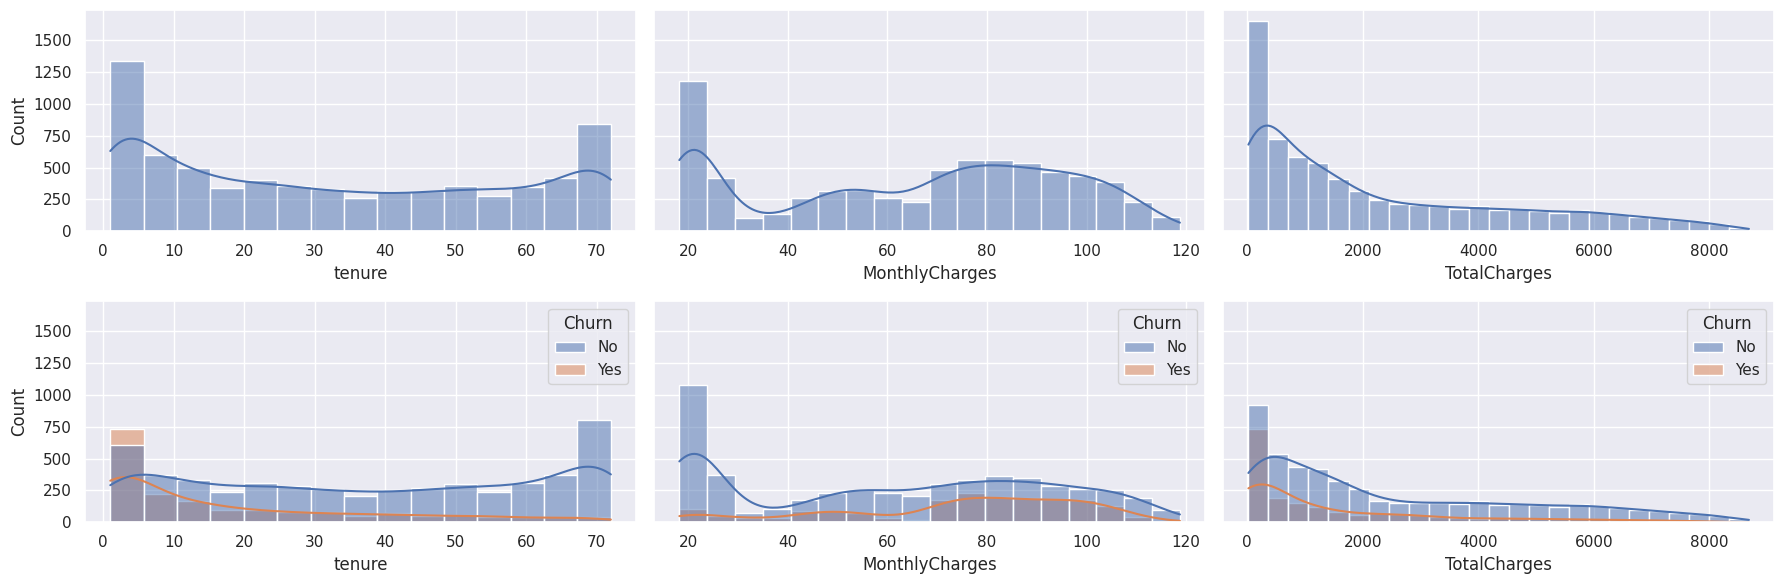

In [ ]:
i=1
plt.subplots(2,3, figsize=(18,6), sharey=True)
for col in num_col:
  plt.subplot(2,3,i)
  sns.histplot(data=data, x=col, kde=True)
  plt.grid(visible=True, which='both', axis='both')

  plt.subplot(2,3,i+3)
  sns.histplot(data=data, x=col, hue="Churn", kde=True)
  plt.grid(visible=True, which='both', axis='both')
  i=i+1
plt.tight_layout()
plt.show()

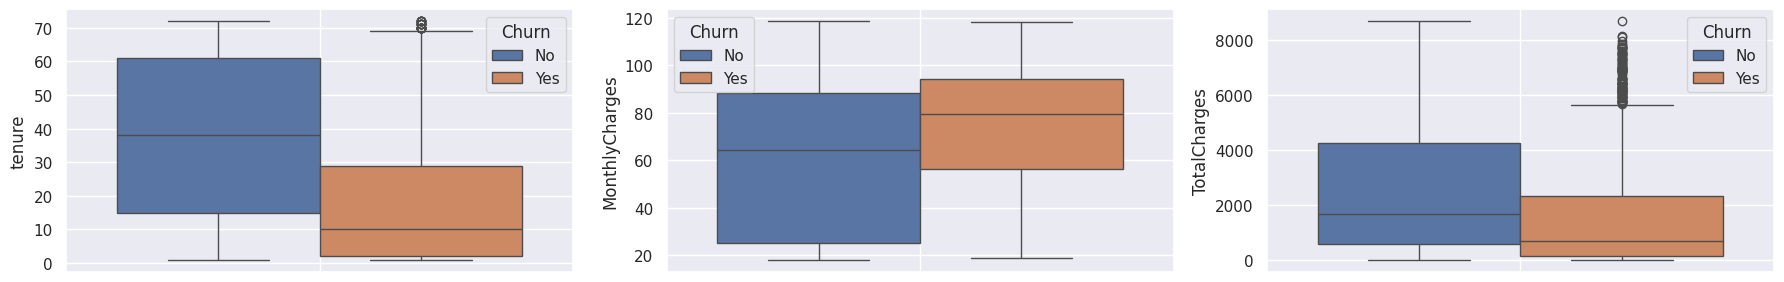

In [ ]:
i=1
plt.subplots(1,3, figsize=(18,3))
for col in num_col:
  plt.subplot(1,3,i)
  sns.boxplot(data=data, y=col, hue="Churn")
  plt.grid(visible=True, which='both', axis='both')
  i=i+1
plt.tight_layout()
plt.show()

In [ ]:
internet=data[(data['InternetService']!='No') & (data['PhoneService']=='No')]
internet.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


In [ ]:
internet.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,1
MultipleLines,1
InternetService,1
OnlineSecurity,2
OnlineBackup,2


In [ ]:
internet_phone=data[(data['InternetService']!='No') & (data['PhoneService']=='Yes')]
internet_phone.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [ ]:
internet_phone.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,1
MultipleLines,2
InternetService,2
OnlineSecurity,2
OnlineBackup,2


In [ ]:
phone=data[(data['InternetService']=='No') & (data['PhoneService']=='Yes')]
phone.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


In [ ]:
phone.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,1
MultipleLines,2
InternetService,1
OnlineSecurity,1
OnlineBackup,1


In [ ]:
len(cat_col)

17

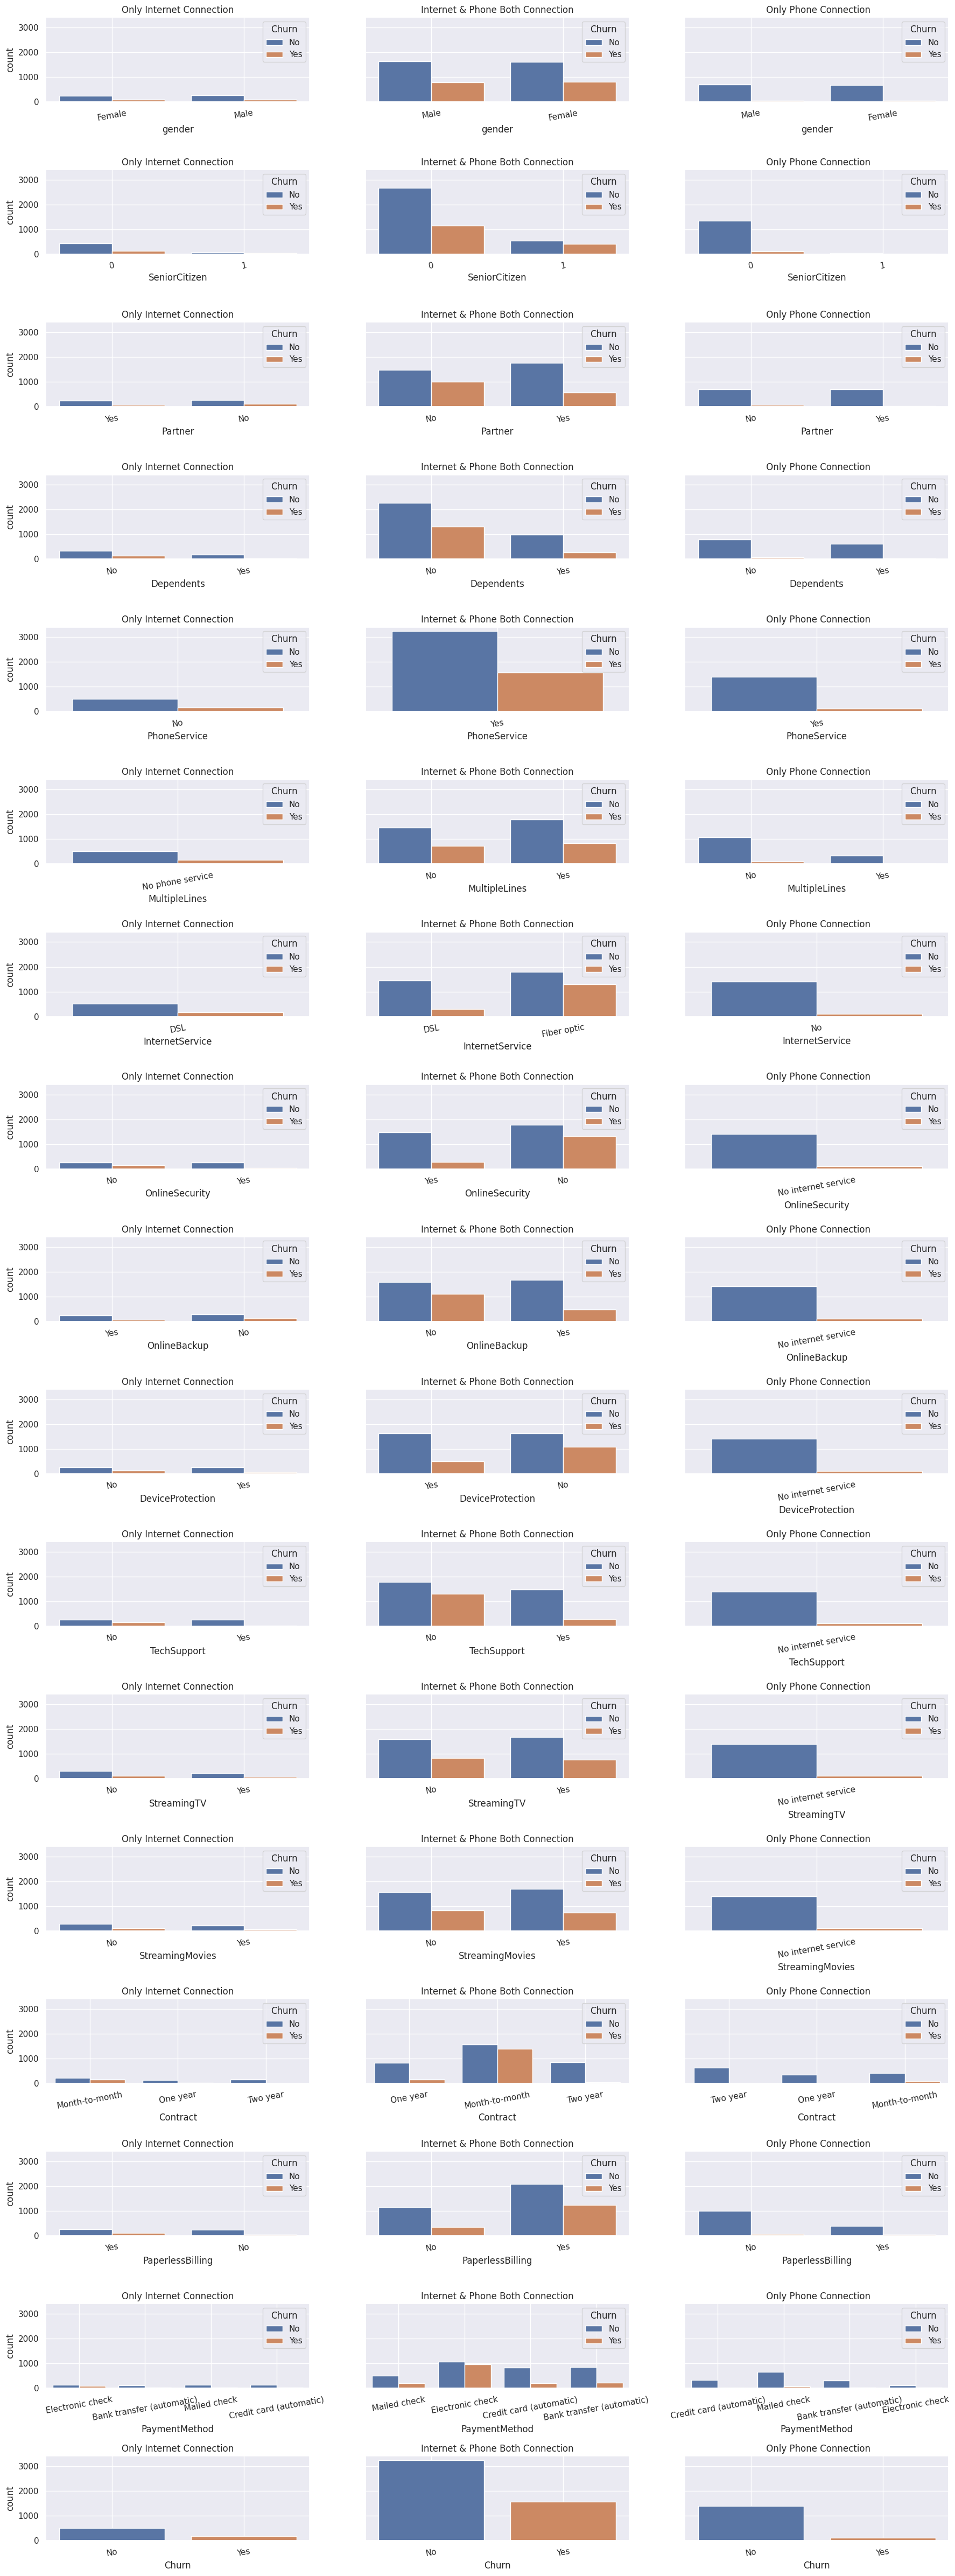

In [ ]:
i=1; j=2; k=3;
plt.subplots(17,3, figsize=(18,48), sharey=True)
for col in cat_col:
    try:

      plt.subplot(17,3,i)
      sns.countplot(x=col,data=internet,hue="Churn")
      plt.title("Only Internet Connection")
      plt.grid(visible=True, which='both', axis='both')
      plt.xticks(rotation=10)

      plt.subplot(17,3,j)
      sns.countplot(x=col,data=internet_phone,hue="Churn")
      plt.title("Internet & Phone Both Connection")
      plt.grid(visible=True, which='both', axis='both')
      plt.xticks(rotation=10)

      plt.subplot(17,3,k)
      sns.countplot(x=col,data=phone,hue="Churn")
      plt.title(" Only Phone Connection")
      plt.grid(visible=True, which='both', axis='both')
      plt.xticks(rotation=10)

      i=i+3
      j=j+3
      k=k+3
    except:
      break
plt.tight_layout()
plt.show()

In [ ]:
len(num_col)

3

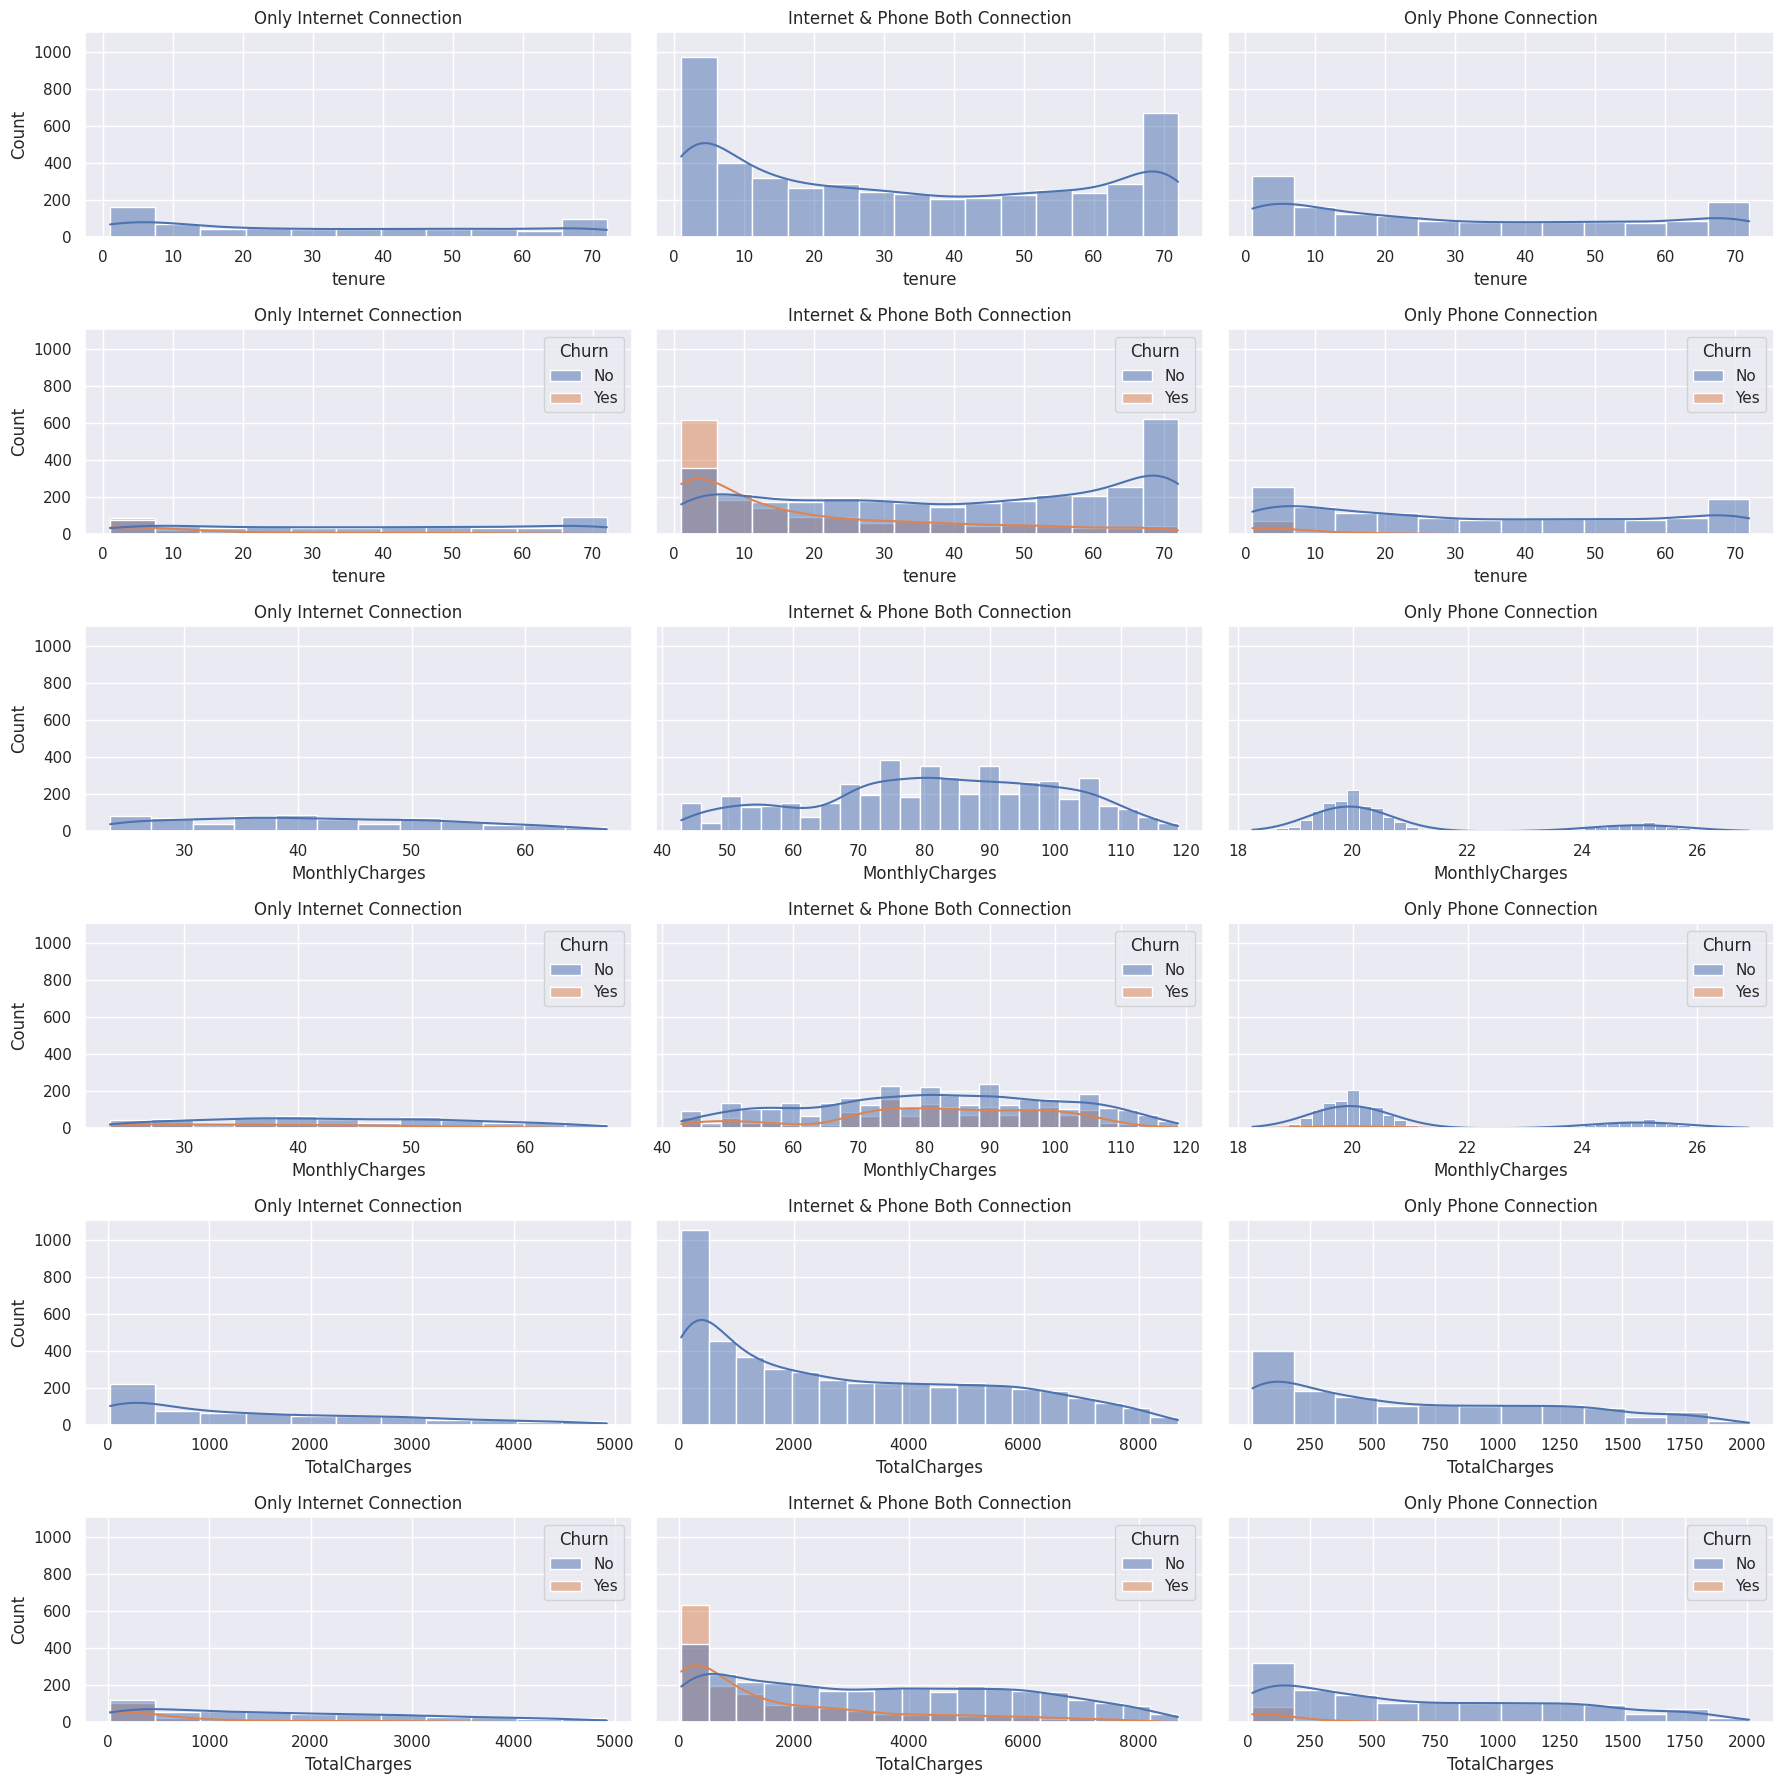

In [ ]:
i=1
j=2
k=3

plt.subplots(6,3, figsize=(18,18), sharey=True)
for col in num_col:

  plt.subplot(6,3,i)
  sns.histplot(data=internet, x=col, kde=True)
  plt.title("Only Internet Connection")
  plt.grid(visible=True, which='both', axis='both')

  plt.subplot(6,3,i+3)
  sns.histplot(data=internet, x=col, hue="Churn", kde=True)
  plt.title("Only Internet Connection")
  plt.grid(visible=True, which='both', axis='both')


  plt.subplot(6,3,j)
  sns.histplot(data=internet_phone, x=col, kde=True)
  plt.title("Internet & Phone Both Connection")
  plt.grid(visible=True, which='both', axis='both')

  plt.subplot(6,3,j+3)
  sns.histplot(data=internet_phone, x=col, hue="Churn", kde=True)
  plt.title("Internet & Phone Both Connection")
  plt.grid(visible=True, which='both', axis='both')


  plt.subplot(6,3,k)
  sns.histplot(data=phone, x=col, kde=True)
  plt.title("Only Phone Connection")
  plt.grid(visible=True, which='both', axis='both')

  plt.subplot(6,3,k+3)
  sns.histplot(data=phone, x=col, hue="Churn", kde=True)
  plt.title("Only Phone Connection")
  plt.grid(visible=True, which='both', axis='both')

  i=i+6
  j=j+6
  k=k+6

plt.tight_layout()
plt.show()

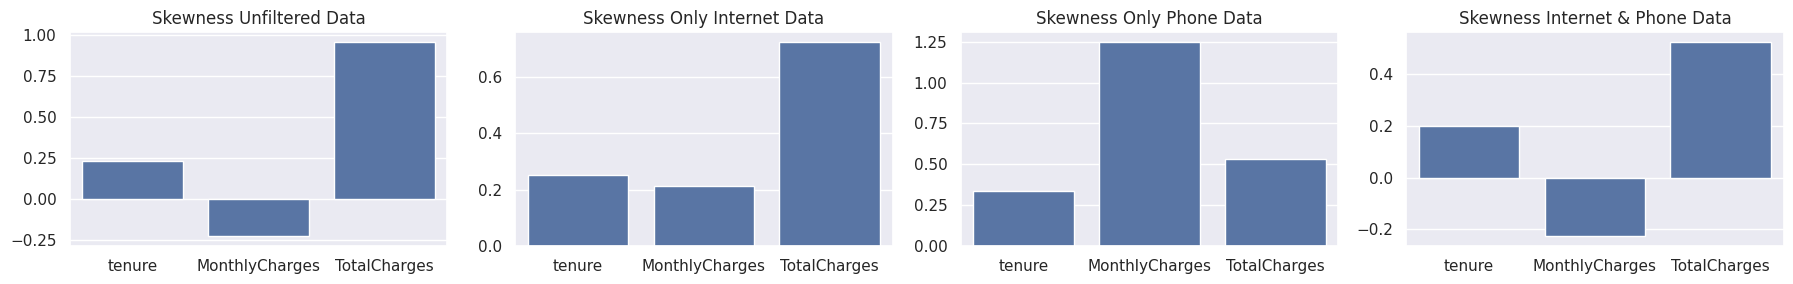

In [ ]:
plt.subplots(1,4, figsize=(18,3))

plt.subplot(1,4,1)
sns.barplot(data[num_col].skew())
plt.title("Skewness Unfiltered Data")

plt.subplot(1,4,2)
sns.barplot(internet[num_col].skew())
plt.title("Skewness Only Internet Data")

plt.subplot(1,4,3)
sns.barplot(phone[num_col].skew())
plt.title("Skewness Only Phone Data")

plt.subplot(1,4,4)
sns.barplot(internet_phone[num_col].skew())
plt.title("Skewness Internet & Phone Data")

plt.tight_layout()
plt.show()

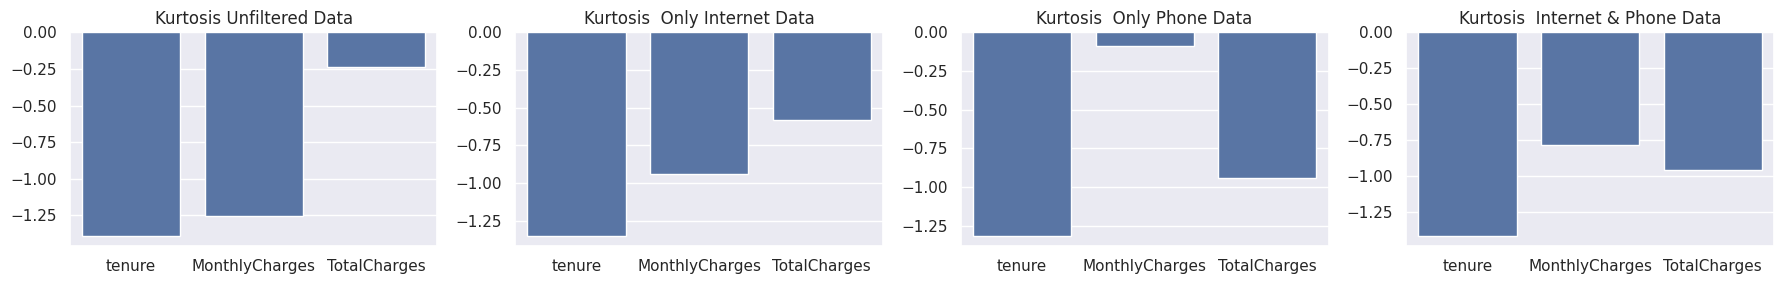

In [ ]:
plt.subplots(1,4, figsize=(18,3))

plt.subplot(1,4,1)
sns.barplot(data[num_col].kurt())
plt.title("Kurtosis Unfiltered Data")

plt.subplot(1,4,2)
sns.barplot(internet[num_col].kurt())
plt.title("Kurtosis  Only Internet Data")

plt.subplot(1,4,3)
sns.barplot(phone[num_col].kurt())
plt.title("Kurtosis  Only Phone Data")

plt.subplot(1,4,4)
sns.barplot(internet_phone[num_col].kurt())
plt.title("Kurtosis  Internet & Phone Data")

plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='percent'>

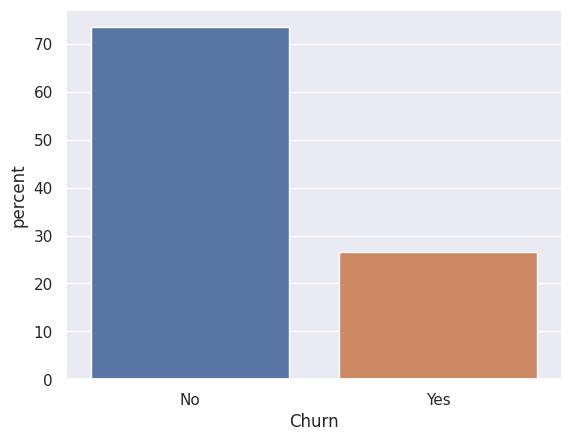

In [ ]:
sns.countplot(data=data, x="Churn",hue="Churn",stat="percent")

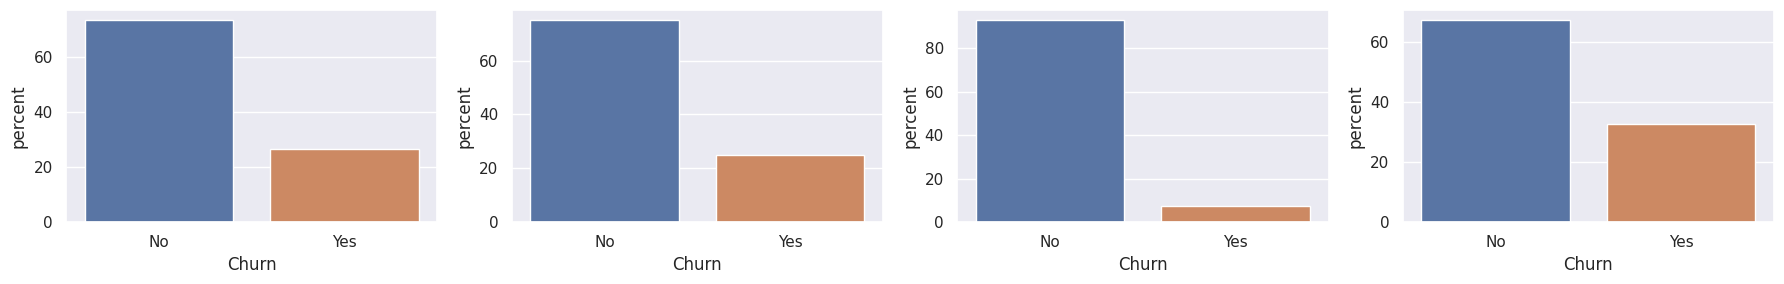

In [ ]:
i=1
plt.subplots(1,4, figsize=(18,3))
for df in ['data','internet','phone','internet_phone']:
  plt.subplot(1,4,i)
  sns.countplot(data=globals()[df], x="Churn",hue="Churn",stat="percent")
  i=i+1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler
one_hot_encoder=OneHotEncoder(drop='first', sparse_output=False)
label_encoder=LabelEncoder()
ordinal_encoder=OrdinalEncoder()
robust_scaler=RobustScaler()

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
median_impute=SimpleImputer(strategy='median')
mode_impute=SimpleImputer(strategy='most_frequent')
knn_impute=KNNImputer(n_neighbors=5)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from scipy.stats import spearmanr, chi2_contingency

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
x=data.drop(columns=['Churn'])
y=data['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101,stratify=y)

In [ ]:
cat_col=x.select_dtypes(include='object').columns
num_col=x.select_dtypes(include=np.number).columns
cat_col,num_col

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

In [ ]:
y_train_label=label_encoder.fit_transform(y_train)
y_test_label=label_encoder.transform(y_test)

In [ ]:
x_train_onehot=one_hot_encoder.fit_transform(x_train[cat_col])
x_train_onehot[0],one_hot_encoder.get_feature_names_out()

(array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0.]),
 array(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
        'PhoneService_Yes', 'MultipleLines_No phone service',
        'MultipleLines_Yes', 'InternetService_Fiber optic',
        'InternetService_No', 'OnlineSecurity_No internet service',
        'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
        'OnlineBackup_Yes', 'DeviceProtection_No internet service',
        'DeviceProtection_Yes', 'TechSupport_No internet service',
        'TechSupport_Yes', 'StreamingTV_No internet service',
        'StreamingTV_Yes', 'StreamingMovies_No internet service',
        'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
        'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
       dtype=object))

In [ ]:
best_cat_features = SelectKBest(score_func = chi2, k='all')
cat_fit = best_cat_features.fit(x_train_onehot,y_train_label)
cat_feature_scores = pd.DataFrame({
    "Feature":one_hot_encoder.get_feature_names_out(),
    "F-statistic": cat_fit.scores_,
    "p-value": cat_fit.pvalues_})
print(cat_feature_scores.sort_values(by='p-value'))
sign_categorical_feature=cat_feature_scores[cat_feature_scores['p-value']<=0.05]['Feature'].values
k_cat=len(sign_categorical_feature)
sign_categorical_feature,k_cat

                                  Feature  F-statistic  p-value
22                      Contract_Two year       383.85     0.00
25         PaymentMethod_Electronic check       345.51     0.00
7             InternetService_Fiber optic       304.34     0.00
13   DeviceProtection_No internet service       227.60     0.00
15        TechSupport_No internet service       227.60     0.00
19    StreamingMovies_No internet service       227.60     0.00
11       OnlineBackup_No internet service       227.60     0.00
9      OnlineSecurity_No internet service       227.60     0.00
8                      InternetService_No       227.60     0.00
17        StreamingTV_No internet service       227.60     0.00
21                      Contract_One year       146.99     0.00
1                         SeniorCitizen_1       111.30     0.00
10                     OnlineSecurity_Yes       110.41     0.00
3                          Dependents_Yes       102.24     0.00
16                        TechSupport_Ye

(array(['SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
        'MultipleLines_Yes', 'InternetService_Fiber optic',
        'InternetService_No', 'OnlineSecurity_No internet service',
        'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
        'OnlineBackup_Yes', 'DeviceProtection_No internet service',
        'DeviceProtection_Yes', 'TechSupport_No internet service',
        'TechSupport_Yes', 'StreamingTV_No internet service',
        'StreamingTV_Yes', 'StreamingMovies_No internet service',
        'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
        'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
       dtype=object),
 24)

In [ ]:
x_train_scaled=robust_scaler.fit_transform(x_train[num_col])
x_train_scaled[0]

array([0.91489362, 0.32332564, 1.45952359])

In [ ]:
best_num_features = SelectKBest(score_func = mutual_info_classif, k='all')
num_fit = best_num_features.fit(x_train_scaled, y_train_label)
num_feature_scores = pd.DataFrame({
    "Feature":num_col,
    "F-statistic": num_fit.scores_,
    "p-value": num_fit.pvalues_})
print(num_feature_scores.sort_values(by='F-statistic', ascending=False))
sign_numerical_feature=num_feature_scores[num_feature_scores['F-statistic']>=0.01]['Feature'].values
k_num=len(sign_numerical_feature)
sign_numerical_feature,k_num

          Feature  F-statistic p-value
0          tenure         0.07    None
1  MonthlyCharges         0.05    None
2    TotalCharges         0.04    None


(array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object), 3)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
cat_pipeline=Pipeline([('Imputer', mode_impute), ('Encoder', one_hot_encoder),
 ('feature_selection',SelectKBest(score_func = chi2, k=k_cat))])
num_pipeline=Pipeline([('Imputer', median_impute), ('Scaler', robust_scaler),
 ('feature_selection',SelectKBest(score_func = mutual_info_classif, k=k_num))])

In [ ]:
cat_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoder', OneHotEncoder(drop='first', sparse_output=False)),
                ('feature_selection',
                 SelectKBest(k=24,
                             score_func=<function chi2 at 0x7998ac2b3380>))])

In [ ]:
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('Scaler', RobustScaler()),
                ('feature_selection',
                 SelectKBest(k=3,
                             score_func=<function mutual_info_classif at 0x7998ac2b1120>))])

In [ ]:
preprocessor=ColumnTransformer([('categorical', cat_pipeline, cat_col),
 ('numerical', num_pipeline, num_col)])
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False)),
                                                 ('feature_selection',
                                                  SelectKBest(k=24,
                                                              score_func=<function chi2 at 0x7998ac2b3380>))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'Inte...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', RobustScaler()),
                                                 ('feature_selection',
                                                  SelectKBest(k=3,
                                                              score_func=<function mutual_info_classif at 0x7998ac2b1120>))]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
lgbm=LGBMClassifier()


In [ ]:
classfier_list=[('lr',lr),('dt',dt),('rf',rf),('svm',svm),('knn',knn),('nb',nb),('gb',gb),('lgbm',lgbm)]
stack_classfier=StackingClassifier(estimators=classfier_list, final_estimator=xgb)

In [ ]:
metrics_df=pd.DataFrame(columns=['Model','Train Score','Test Score','Train AUC Score','Test AUC Score'])
for classfier in [lr,dt,rf,svm,knn,nb,gb,xgb,lgbm,stack_classfier]:
  model_pipeline=Pipeline([('preprocessor', preprocessor),
  ('classifier', classfier)])
  model_pipeline.fit(x_train, y_train_label)
  test_score=model_pipeline.score(x_test, y_test_label)
  train_score=model_pipeline.score(x_train, y_train_label)
  try:
    test_score=model_pipeline.score(x_test, y_test_label)
    train_score=model_pipeline.score(x_train, y_train_label)
    test_auc_score=roc_auc_score(y_test_label, model_pipeline.predict_proba(x_test)[:, 1])
    train_auc_score=roc_auc_score(y_train_label, model_pipeline.predict_proba(x_train)[:, 1])
  except:
    test_score=None
    train_score=None
    test_auc_score=None
    train_auc_score=None
  metrics_df.loc[len(metrics_df)]=[classfier,train_score,test_score,train_auc_score,test_auc_score]
metrics_df



[LightGBM] [Info] Number of positive: 1486, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264979 -> initscore=-1.020251
[LightGBM] [Info] Start training from score -1.020251
[LightGBM] [Info] Number of positive: 1486, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 27
[LightGBM] [Info] [binary:

,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
0,LogisticRegression(),0.81,0.79,0.85,0.84
1,DecisionTreeClassifier(),1.00,0.74,1.00,0.65
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.78,1.00,0.81
3,SVC(),NaN,NaN,NaN,NaN
4,KNeighborsClassifier(),0.84,0.76,0.90,0.77
5,GaussianNB(),0.67,0.65,0.82,0.82
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.83,0.79,0.88,0.83
7,"XGBClassifier(base_score=None, booster=None, c...",0.93,0.78,0.98,0.81
8,LGBMClassifier(),0.88,0.79,0.95,0.82
9,"StackingClassifier(estimators=[('lr', Logistic...",0.80,0.78,0.84,0.82


In [ ]:
score_thres=0.785
auc_thres=0.785
metrics_df[((metrics_df['Test AUC Score']>auc_thres) & (metrics_df['Test Score']>score_thres)
           & (metrics_df['Train Score']>score_thres) & (metrics_df['Train AUC Score']>auc_thres))]

,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
0,LogisticRegression(),0.81,0.79,0.85,0.84
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.83,0.79,0.88,0.83
8,LGBMClassifier(),0.88,0.79,0.95,0.82


In [ ]:
cat_pipeline=Pipeline([('Imputer', mode_impute), ('Encoder', one_hot_encoder),
 ('feature_selection',SelectKBest(score_func = chi2, k='all'))])
num_pipeline=Pipeline([('Imputer', median_impute), ('Scaler', robust_scaler),
 ('feature_selection',SelectKBest(score_func = mutual_info_classif, k='all'))])

In [ ]:
preprocessor=ColumnTransformer([('categorical', cat_pipeline, cat_col),
 ('numerical', num_pipeline, num_col)])

In [ ]:
metrics_df=pd.DataFrame(columns=['Model','Train Score','Test Score','Train AUC Score','Test AUC Score'])
for classfier in [lr,dt,rf,svm,knn,nb,gb,xgb,lgbm,stack_classfier]:
  model_pipeline=Pipeline([('preprocessor', preprocessor),
  ('classifier', classfier)])
  model_pipeline.fit(x_train, y_train_label)
  test_score=model_pipeline.score(x_test, y_test_label)
  train_score=model_pipeline.score(x_train, y_train_label)
  try:
    test_score=model_pipeline.score(x_test, y_test_label)
    train_score=model_pipeline.score(x_train, y_train_label)
    test_auc_score=roc_auc_score(y_test_label, model_pipeline.predict_proba(x_test)[:, 1])
    train_auc_score=roc_auc_score(y_train_label, model_pipeline.predict_proba(x_train)[:, 1])
  except:
    test_score=None
    train_score=None
    test_auc_score=None
    train_auc_score=None
  metrics_df.loc[len(metrics_df)]=[classfier,train_score,test_score,train_auc_score,test_auc_score]
metrics_df



[LightGBM] [Info] Number of positive: 1486, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264979 -> initscore=-1.020251
[LightGBM] [Info] Start training from score -1.020251
[LightGBM] [Info] Number of positive: 1486, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 5608, number of used features: 30
[LightGBM] [Info] [binary:

,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
0,LogisticRegression(),0.81,0.79,0.85,0.84
1,DecisionTreeClassifier(),1.00,0.71,1.00,0.62
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.79,1.00,0.81
3,SVC(),NaN,NaN,NaN,NaN
4,KNeighborsClassifier(),0.84,0.77,0.90,0.77
5,GaussianNB(),0.67,0.65,0.82,0.81
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.83,0.79,0.88,0.84
7,"XGBClassifier(base_score=None, booster=None, c...",0.93,0.78,0.98,0.81
8,LGBMClassifier(),0.88,0.78,0.95,0.82
9,"StackingClassifier(estimators=[('lr', Logistic...",0.76,0.78,0.79,0.81


In [ ]:
score_thres=0.785
auc_thres=0.785
metrics_df[((metrics_df['Test AUC Score']>auc_thres) & (metrics_df['Test Score']>score_thres)
           & (metrics_df['Train Score']>score_thres) & (metrics_df['Train AUC Score']>auc_thres))]

,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
0,LogisticRegression(),0.81,0.79,0.85,0.84
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.79,1.00,0.81
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.83,0.79,0.88,0.84


In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [ ]:
metrics_df=pd.DataFrame(columns=['Model','Train Score','Test Score','Train AUC Score','Test AUC Score'])
for classfier in [lr,dt,rf,svm,knn,nb,gb,xgb,lgbm,stack_classfier]:
  model_pipeline=imbpipeline([('preprocessor', preprocessor),('smote',SMOTE()),
  ('classifier', classfier)])
  model_pipeline.fit(x_train, y_train_label)
  test_score=model_pipeline.score(x_test, y_test_label)
  train_score=model_pipeline.score(x_train, y_train_label)
  try:
    test_score=model_pipeline.score(x_test, y_test_label)
    train_score=model_pipeline.score(x_train, y_train_label)
    test_auc_score=roc_auc_score(y_test_label, model_pipeline.predict_proba(x_test)[:, 1])
    train_auc_score=roc_auc_score(y_train_label, model_pipeline.predict_proba(x_train)[:, 1])
  except:
    test_score=None
    train_score=None
    test_auc_score=None
    train_auc_score=None
  metrics_df.loc[len(metrics_df)]=[classfier,train_score,test_score,train_auc_score,test_auc_score]
metrics_df

[LightGBM] [Info] Number of positive: 4122, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 8244, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4122, number of negative: 4122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2638
[LightGBM] [Info] Number of data points in the train set: 8244, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
0,LogisticRegression(),0.76,0.75,0.85,0.84
1,DecisionTreeClassifier(),1.00,0.74,1.00,0.68
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.78,1.00,0.82
3,SVC(),NaN,NaN,NaN,NaN
4,KNeighborsClassifier(),0.81,0.68,0.94,0.75
5,GaussianNB(),0.67,0.66,0.82,0.81
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.81,0.77,0.87,0.84
7,"XGBClassifier(base_score=None, booster=None, c...",0.92,0.79,0.98,0.81
8,LGBMClassifier(),0.87,0.78,0.93,0.82
9,"StackingClassifier(estimators=[('lr', Logistic...",0.94,0.78,0.98,0.79


In [ ]:
score_thres=0.785
auc_thres=0.785
metrics_df[((metrics_df['Test AUC Score']>auc_thres) & (metrics_df['Test Score']>score_thres)
           & (metrics_df['Train Score']>score_thres) & (metrics_df['Train AUC Score']>auc_thres))]

,Model,Train Score,Test Score,Train AUC Score,Test AUC Score
7,"XGBClassifier(base_score=None, booster=None, c...",0.92,0.79,0.98,0.81
